In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_csv("/content/archive (15).zip")

In [12]:
df.shape

(53940, 11)

In [13]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [17]:
df.nunique()

,0
Unnamed: 0,53940
carat,273
cut,5
color,7
clarity,8
depth,184
table,127
price,11602
x,554
y,552


In [18]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [19]:
#convert categorical to numeric
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
categorical_cols = ['cut', 'color', 'clarity']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [23]:
df = df.drop(columns=['Unnamed: 0'])

In [24]:
corr = df.corr()

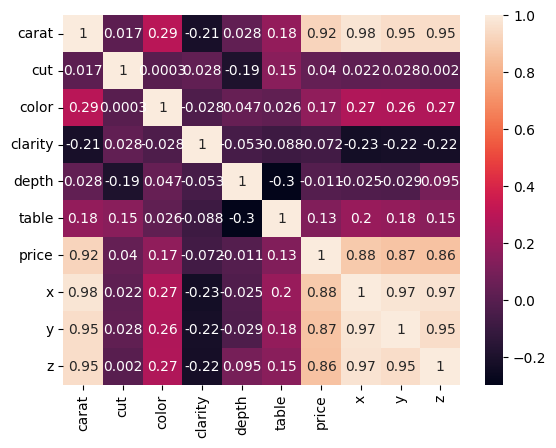

In [25]:
sns.heatmap(corr, annot=True)
figure_size = (15,15)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [27]:
X = df.drop(['price'],axis=1)
y = df['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

In [30]:
X_train = sclr.fit_transform(X_train)
X_test = sclr.fit_transform(X_test)

In [31]:
models = {
    'dtc':DecisionTreeRegressor(),
    'rfc':RandomForestRegressor(),
    'lrr':LinearRegression()}

In [33]:
for name,model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    mae = mean_absolute_error(y_test, ypred)
    r2 = r2_score(y_test, ypred)

    print(f"Model: {name}")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  R-squared (R2) Score: {r2:.4f}\n")

Model: dtc
  Mean Absolute Error: 372.31
  R-squared (R2) Score: 0.9672

Model: rfc
  Mean Absolute Error: 283.91
  R-squared (R2) Score: 0.9799

Model: lrr
  Mean Absolute Error: 860.58
  R-squared (R2) Score: 0.8852



In [ ]:
#random forset did best 97